# Assignment 1/Part A - Cleaning and EDA on Cambridge Housing Code Violation Dataset

#### Note: I had a meeting with the professor. I showed him the dataset and also showed him the analysis I have done. Since it's mostly a catrgorical dataset, there are lot's of places where we can't have summary statistics or create distribution graphs as you would do for continuous variable. I have tried to put in almost all possible things for an EDA. I was planning to do clustering of addresses based on the GIS data, but he suggested at this moment doing it would be little out of scope and can be included in the further assignments. 

## Importing Dependiencies 

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.core.display import Image

## Loading Data

In [2]:
Housing_Violation = pd.read_csv("~/Desktop/Khanooja_Gurtej_Assignment_1/Part_A/Housing_Code_Violations.csv")

In [3]:
# Doing a lazy evaluation to see the first few rows of the dataset. If the data is labelled properly we can get a good 
# idea what the headers can mean
Housing_Violation.head()

Address  Parcel  Code Number  \
0  14 KIRKLAND PL\nCambridge, MA 02139\n(42.37831...  145-11      410.550   
1  67 Holworthy St\nCambridge, MA 02139\n(42.3764...   253-8      410.500   
2  309 BROADWAY\nCambridge, MA 02139\n(42.369019,...  87-136      410.600   
3  207 Grove St\nCambridge, MA 02139\n(42.383994,...   266-9      410.452   
4  118 MAGAZINE ST\nCambridge, MA 02139\n(42.3597...  102-25      410.600   

                                Code Description              Date Cited  \
0   Extermination of Insects, Rodents and Skunks  05/25/2016 12:00:00 AM   
1  Owner's Resp. to Maintain Structural Elements  11/30/2015 12:00:00 AM   
2                 Storage of Garbage and Rubbish  09/01/2016 12:00:00 AM   
3                                 Safe Condition  06/27/2016 12:00:00 AM   
4                 Storage of Garbage and Rubbish  05/26/2016 12:00:00 AM   

           Date Corrected Violation Status      Case Number Code Case Status  
0  06/28/2016 12:00:00 AM        Corrected  HOU-013219-2016           Closed  
1  01/14/2016 12:00:00 AM        Corrected  HOU-009963-2015           Closed  
2  10/04/2016 12:00:00 AM        Corrected  HOU-014957-2016           Closed  
3  07/11/2016 12:00:00 AM        Corrected  HOU-013781-2016           Closed  
4  06/29/2016 12:00:00 AM        Corrected  HOU-013254-2016           Closed

Some inferences from the above result is as follows:

* Address: The address of the place where the violation occoured
* Parcel: Meaning not clear yet
* Code Number: Refers to type of violation. Since it's housing violation the first three numbers are the same. Only 
 the number after the dot is useed to differentiate between different violations.
* Code Description: Meaning of offence against the code number
* Data Cited: The date when violation was issued
* Data Completed: The date when the citation was closed 
* Status: Status of the violation whether corrected or not
* Case Number: The case number corrosponding to the violation, can be considered as the primary key in this case
* Code Case Status: Status of the case, whether open or closed


In [4]:
#Creating copy of the dataset, all the manuplations will be done on the new dataset
Housing_Violation_Copy = Housing_Violation.copy()

In [5]:
#Removing spaces from coloumn_name
Housing_Violation_Copy = Housing_Violation.rename(columns={"Address": "Address", "Parcel": "Parcel", "Code Number": "Code_Number", 
                                                     "Code Description": "Code_Description","Date Cited": "Date_Cited","Date Corrected": "Date_Corrected",
                                                     "Violation Status": "Violation_Status","Case Number": "Case_Number", "Code Case Status":"Code_Case_Status"})

In [6]:
Housing_Violation_Copy.shape

(6688, 9)

From above we can see that the dimensions of our datasets is 6689 x 9. Thr 9 attributes in the datset and their explinations are listed above.

## Data Cleaning 

In [7]:
#Removing white Spaces from the Address and Stripping Latitude and Longitude from the Address
Address = Housing_Violation_Copy["Address"].str.split("\n").str[0] + " " +Housing_Violation_Copy["Address"].str.split("\n").str[1]
Address.head()

0     14 KIRKLAND PL Cambridge, MA 02139
1    67 Holworthy St Cambridge, MA 02139
2       309 BROADWAY Cambridge, MA 02139
3       207 Grove St Cambridge, MA 02139
4    118 MAGAZINE ST Cambridge, MA 02139
Name: Address, dtype: object

In [8]:
#Saving Latitude and Logitude in a different Variable
Coordinates =  Housing_Violation_Copy["Address"].str.split("\n").str[2]
Coordinates.head()

0    (42.378316, -71.113105)
1    (42.376489, -71.150302)
2    (42.369019, -71.100253)
3    (42.383994, -71.158899)
4    (42.359744, -71.110388)
Name: Address, dtype: object

In [9]:
#Replacing the old address with the new one without "/n" and stripped off latitude and longitude
Housing_Violation_Copy["Address"] = Address

In [10]:
#Creating a new coloumn for latitude and longitude
Housing_Violation_Copy["Coordinates"] = Coordinates

In [11]:
#This is how the transformation in dataset looks 
Housing_Violation_Copy

Address       Parcel  Code_Number  \
0                14 KIRKLAND PL Cambridge, MA 02139       145-11      410.550   
1               67 Holworthy St Cambridge, MA 02139        253-8      410.500   
2                  309 BROADWAY Cambridge, MA 02139       87-136      410.600   
3                  207 Grove St Cambridge, MA 02139        266-9      410.452   
4               118 MAGAZINE ST Cambridge, MA 02139       102-25      410.600   
5                 213 HURLEY ST Cambridge, MA 02139        24-31      410.602   
6     273 CARDINAL MEDEIROS AVE Cambridge, MA 02139       40-110      410.602   
7                   28 RIVER ST Cambridge, MA 02139      105-120      410.600   
8                    51 DANA ST Cambridge, MA 02139       139-31      410.551   
9                  323 River St Cambridge, MA 02139       129-42      410.201   
10                17 FAYETTE ST Cambridge, MA 02139       113-67      410.500   
11                17 Putnam Ave Cambridge, MA 02139       132-50      410.600   
12                 323 River St Cambridge, MA 02139       129-42      410.500   
13            1667 CAMBRIDGE ST Cambridge, MA 02139      142-132      410.550   
14                    19 OAK ST Cambridge, MA 02139        83-57      410.600   
15             113 HAMPSHIRE ST Cambridge, MA 02139       79-115      410.351   
16                 35 EUSTIS ST Cambridge, MA 02139       151-60      410.600   
17                   81 DANA ST Cambridge, MA 02139       139-18      410.253   
18               98 Columbia St Cambridge, MA 02139      75-20-2      410.550   
19            1643 CAMBRIDGE ST Cambridge, MA 02139   140-149-55      410.500   
20                2 LEONARD AVE Cambridge, MA 02139       140-57      410.600   
21                 57 MAGOUN ST Cambridge, MA 02139       188-81      410.550   
22                132 OXFORD ST Cambridge, MA 02139  151-75-27/6      410.500   
23                40 COTTAGE ST Cambridge, MA 02139       104-92      410.602   
24               18 PLEASANT ST Cambridge, MA 02139       105-56      410.600   
25                 116 INMAN ST Cambridge, MA 02139      110-123      410.602   
26                   1 Salem St Cambridge, MA 02139       93-6-1      410.550   
27       2072 MASSACHUSETTS AVE Cambridge, MA 02139       200-22      410.602   
28               2 Coolidge Ave Cambridge, MA 02139     242A-155      410.482   
29          21 Walden Square Rd Cambridge, MA 02139      203B-66      410.351   
...                                             ...          ...          ...   
6658                  55 Jay St Cambridge, MA 02139       123-28      410.253   
6659                  55 Jay St Cambridge, MA 02139       123-28      410.750   
6660  241 CARDINAL MEDEIROS AVE Cambridge, MA 02139       40-203      410.550   
6661             69 Chestnut St Cambridge, MA 02139        96-67      410.602   
6662             160 Harvard St Cambridge, MA 02139       73-124      410.451   
6663             69 Chestnut St Cambridge, MA 02139        96-67      410.550   
6664              10 MUSEUM WAY Cambridge, MA 02139  1A-109-N524      410.351   
6665              10 MUSEUM WAY Cambridge, MA 02139  1A-109-N524      410.351   
6666                  55 Jay St Cambridge, MA 02139       123-28      410.450   
6667                  55 Jay St Cambridge, MA 02139       123-28      410.504   
6668             160 Harvard St Cambridge, MA 02139       73-124      410.810   
6669                  55 Jay St Cambridge, MA 02139       123-28      410.201   
6670             160 Harvard St Cambridge, MA 02139       73-124      410.352   
6671            216 Columbia St Cambridge, MA 02139        76-18      410.550   
6672            216 Columbia St Cambridge, MA 02139        76-18      410.600   
6673          1221 Cambridge St Cambridge, MA 02139         82-8      410.352   
6674            309 COLUMBIA ST Cambridge, MA 02139        79-15      410.600   
6675              90 NORFOLK ST Cambridge, MA 02139         89-3      410.5

In [12]:
Housing_Violation_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 10 columns):
Address             6688 non-null object
Parcel              6535 non-null object
Code_Number         6688 non-null float64
Code_Description    6688 non-null object
Date_Cited          6688 non-null object
Date_Corrected      6688 non-null object
Violation_Status    6688 non-null object
Case_Number         6688 non-null object
Code_Case_Status    6688 non-null object
Coordinates         6688 non-null object
dtypes: float64(1), object(9)
memory usage: 522.6+ KB


From above we see the datatype for each coloumn and see the number of non-null values for each coloumn. It looks like parcel has some non numm values. Let's explore more about it.

In [13]:
Housing_Violation_Copy.isnull().sum()

Address               0
Parcel              153
Code_Number           0
Code_Description      0
Date_Cited            0
Date_Corrected        0
Violation_Status      0
Case_Number           0
Code_Case_Status      0
Coordinates           0
dtype: int64

From above we see that parcel has 153 missing values in form of null values. Let's check if there are more missing values in the dataset, mostly the most common form for missing values is having 0s instead of null.

In [14]:
for i in Housing_Violation_Copy:
    print(sum(Housing_Violation_Copy[i] == 0))

0
0
0
0
0
0
0
0
0
0


From above we see there are no missing values in form of 0s.

The dataset looks clean and ready for further exploratory analysis. Let's anaswer some questions before we move on:

* What about missing values:

We found out that there were 153 Null values in "parcel coloumn" but the exact meaning of parcel is not clear from the data source, moreover just by looking at the variable it seems to be not so important for analysis, so at this point we don't need to take any further steps for the missing data.

* Are there inappropriate values?

Yes, the address had white spaces in them. We stripped off the white spaces and improved the dataset to remove them. Moreover, we also stripped the latitude and longitude and put it in a seperate coloum. It might be useful in analysis as a seperate entity.

* Removing Bad Data and impute values:

As such the only bad data we had was the address, which was dealt as explained above. There are no missing values where imputation is requried.

## Column Wise Data Analysis

### Address

In [15]:
#Let's see if there are some same addresses which received multiple violations
Housing_Violation_Copy["Address"].value_counts()

10 Magazine St Cambridge, MA 02139           33
254 Western Ave Cambridge, MA 02139          30
35 BROOKLINE ST Cambridge, MA 02139          30
369 Prospect St Cambridge, MA 02139          28
67 GORE ST Cambridge, MA 02139               27
7 Seckel St Cambridge, MA 02139              26
89 HANCOCK ST Cambridge, MA 02139            21
183 HARVARD ST Cambridge, MA 02139           21
1221 Cambridge St Cambridge, MA 02139        20
28 RIVER ST Cambridge, MA 02139              20
154 Magazine St Cambridge, MA 02139          20
470 Green St Cambridge, MA 02139             19
4 ELLSWORTH AVE Cambridge, MA 02139          19
812 Memorial Dr Cambridge, MA 02139          19
113 HAMPSHIRE ST Cambridge, MA 02139         18
855 Cambridge St Cambridge, MA 02139         18
62 SPRING ST Cambridge, MA 02139             17
362 Rindge Ave Cambridge, MA 02139           17
14 SECOND ST Cambridge, MA 02139             17
217 Auburn St Cambridge, MA 02139            17
5 DAY ST Cambridge, MA 02139            

It seems from the above result that there are multiple addresses with more than one violations. Let us explore how many of these houses exist and if there is something unique about them.

In [16]:
#Converting the value count core series to dictionary
Housing_Violation_Dict = Housing_Violation_Copy["Address"].value_counts().to_dict()  

In [17]:
#Finding out number of addresses where multiple Violations are Registered
Multiple_Violations = {}
for key, value in Housing_Violation_Dict.items():
    if Housing_Violation_Dict[key] > 1:
        Multiple_Violations.update({key:value})

len(Multiple_Violations)

1375

From above we can see that there are 1375 addresses which have more that one violation registered against them

In [18]:
Single_Violation = {}
for key, value in Housing_Violation_Dict.items():
    if Housing_Violation_Dict[key] == 1:
        Single_Violation.update({key:value})

len(Single_Violation)

1106

From the above two pieces of code we can see that there are only 1106 addresses that have single violation registered and 1375 addresses have more than one violation registered against them.

In [19]:
#Maximum number of violation against a single address listed in dataset 
Max_Violation = max(Multiple_Violations, key = Multiple_Violations.get)
print("Maximum number of violations happend at" + " " + Max_Violation + " " + "and number of violations were")
print(Multiple_Violations[Max_Violation])


Maximum number of violations happend at 10 Magazine St Cambridge, MA 02139 and number of violations were
33


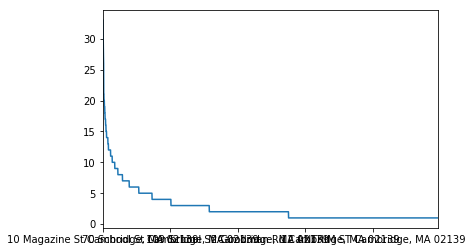

In [20]:
Housing_Violation_Copy["Address"].value_counts().plot()

Graphically also we can verify that more that 50 percent of addresses have more than one violation

In [21]:
#Let's take the address with most violations and see what's unusually wrong with it
Address_Most_Violation = Housing_Violation_Copy[Housing_Violation_Copy.Address == "10 Magazine St Cambridge, MA 02139"]
Address_Most_Violation

Address   Parcel  Code_Number  \
1477  10 Magazine St Cambridge, MA 02139  106-125      410.351   
1515  10 Magazine St Cambridge, MA 02139  106-125      410.500   
1667  10 Magazine St Cambridge, MA 02139  106-125      410.351   
1748  10 Magazine St Cambridge, MA 02139  106-125      410.500   
1817  10 Magazine St Cambridge, MA 02139  106-125      410.351   
2174  10 Magazine St Cambridge, MA 02139  106-125      410.500   
2408  10 Magazine St Cambridge, MA 02139  106-125      410.351   
2473  10 Magazine St Cambridge, MA 02139  106-125      410.550   
2602  10 Magazine St Cambridge, MA 02139  106-125      410.351   
2637  10 Magazine St Cambridge, MA 02139  106-125      410.351   
2671  10 Magazine St Cambridge, MA 02139  106-125      410.250   
2774  10 Magazine St Cambridge, MA 02139  106-125      410.750   
2804  10 Magazine St Cambridge, MA 02139  106-125      410.550   
2847  10 Magazine St Cambridge, MA 02139  106-125      410.500   
3002  10 Magazine St Cambridge, MA 02139  106-125      410.351   
3085  10 Magazine St Cambridge, MA 02139  106-125      410.602   
3121  10 Magazine St Cambridge, MA 02139  106-125      410.550   
3198  10 Magazine St Cambridge, MA 02139  106-125      410.180   
3275  10 Magazine St Cambridge, MA 02139  106-125      410.351   
3372  10 Magazine St Cambridge, MA 02139  106-125      410.351   
3435  10 Magazine St Cambridge, MA 02139  106-125      410.500   
3454  10 Magazine St Cambridge, MA 02139  106-125      410.351   
3525  10 Magazine St Cambridge, MA 02139  106-125      410.351   
4028  10 Magazine St Cambridge, MA 02139  106-125      410.351   
4104  10 Magazine St Cambridge, MA 02139  106-125      410.351   
4136  10 Magazine St Cambridge, MA 02139  106-125      410.602   
4660  10 Magazine St Cambridge, MA 02139  106-125      410.190   
4718  10 Magazine St Cambridge, MA 02139  106-125      410.201   
4777  10 Magazine St Cambridge, MA 02139  106-125      410.500   
4874  10 Magazine St Cambridge, MA 02139  106-125      410.351   
5175  10 Magazine St Cambridge, MA 02139  106-125      410.351   
5508  10 Magazine St Cambridge, MA 02139  106-125      410.351   
5783  10 Magazine St Cambridge, MA 02139  106-125      410.501   

                                       Code_Description  \
1477          Owner's Inst. and Maint. Responsibilities   
1515      Owner's Resp. to Maintain Structural Elements   
1667          Owner's Inst. and Maint. Responsibilities   
1748      Owner's Resp. to Maintain Structural Elements   
1817          Owner's Inst. and Maint. Responsibilities   
2174      Owner's Resp. to Maintain Structural Elements   
2408          Owner's Inst. and Maint. Responsibilities   
2473       Extermination of Insects, Rodents and Skunks   
2602          Owner's Inst. and Maint. Responsibilities   
2637          Owner's Inst. and Maint. Responsibilities   
2671  Habitable Rooms Oth Kitchen, Natl Light, Elec ...   
2774  Cond. Deemed to Endgr. or Impair Health or Safety   
2804       Extermination of Insects, Rodents and Skunks   
2847      Owner's Resp. to Maintain Structural Elements   
3002          Owner's Inst. and Maint. Responsibilities   
3085      Maint. of Areas Free from Garbage and Rubbish   
3121       Extermination of Insects, Rodents and Skunks   
3198                                      Potable Water   
3275          Owner's Inst. and Maint. Responsibilities   
3372          Owner's Inst. and Maint. Responsibilities   
3435      Owner's Resp. to Maintain Structural Elements   
3454          Owner's Inst. and Maint. Responsibilities   
3525          Owner's Inst. and Maint. Responsibilities   
4028          Owner's Inst. and Maint. Responsibilities   
4104          Owner's Inst. and Maint. Responsibilities   
4136      Maint. of Areas Free from Garbage and Rubbish   
4660                                          Hot Water   
4718                           Temperature Requirements   
4777      Owner's Resp. to Maintain Structural Elements   
4874          Owne

In [22]:
Address_Most_Violation.Code_Number.value_counts()

410.351    16
410.500     6
410.550     3
410.602     2
410.501     1
410.201     1
410.190     1
410.180     1
410.750     1
410.250     1
Name: Code_Number, dtype: int64

In [23]:
Address_Most_Violation.Code_Description.value_counts()

Owner's Inst. and Maint. Responsibilities             16
Owner's Resp. to Maintain Structural Elements          6
Extermination of Insects, Rodents and Skunks           3
Maint. of Areas Free from Garbage and Rubbish          2
Weathertight Elements                                  1
Temperature Requirements                               1
Cond. Deemed to Endgr. or Impair Health or Safety      1
Habitable Rooms Oth Kitchen, Natl Light, Elec Out.     1
Potable Water                                          1
Hot Water                                              1
Name: Code_Description, dtype: int64

Just from quick go through of above data, the address which has highest number of registered violations has 33 violations. Some violations have been repeated several times and there are 10 unique violations. The most common violation is 410.351 which is Owner's Inst. and Maint. Responsibilities. Mostly of the cases are closed until the most recent one.

Meaning of parcel attribute was not clear and was not explicitly mentioned with the data source documentation, from the above analysis it can be seen that parcel is same for the same address, so it should have a relation with the address for which the violation is registered. But how is it related to address is something we are not sure. Let's explore further to see if we can get the relation.

### Parcel

In [24]:
Housing_Violation_Copy.Parcel.value_counts()

76-126          55
83-45           38
106-125         33
268B-42         30
35-32           28
36-71           28
128-30          27
91-72           26
82-8            24
112-97          23
94-175          23
35-60           22
36-266          22
116-91          21
105-55          19
119-88          19
36-127          19
99-26           19
100-62          19
79-115          18
94-53           18
255-32          17
89-3            17
191-65          17
203B-66         17
20-70           17
26-59           17
178-34          17
81-95           17
24-13           17
                ..
89-98            1
139-65           1
126-60-3         1
88-57            1
1A-171-117       1
89-6-2           1
196-124-B1       1
204-133-31/2     1
91-201           1
112-90-2         1
141-49-62        1
188-129          1
112-88           1
193-199-2        1
35-98            1
83-97            1
103-44-23/2      1
172-63           1
134-59           1
155-40-1         1
95-14-1          1
103-4-1     

We can see that parcel code "76-126" has 55 counts which is more that the number of counts for address with maximum violation. So specifically it is not necesssary that a unique parcel is related to unique address. Let's see what else can be done.

In [25]:
Housing_Violation_Copy[Housing_Violation_Copy.Parcel == "76-126"]

Address  Parcel  Code_Number  \
282     183 HARVARD ST Cambridge, MA 02139  76-126      410.500   
290     183 HARVARD ST Cambridge, MA 02139  76-126      410.600   
344     183 HARVARD ST Cambridge, MA 02139  76-126      410.451   
432     183 HARVARD ST Cambridge, MA 02139  76-126      410.550   
448     183 HARVARD ST Cambridge, MA 02139  76-126      410.551   
461     183 HARVARD ST Cambridge, MA 02139  76-126      410.602   
491     183 HARVARD ST Cambridge, MA 02139  76-126      410.500   
1507    183 Harvard St Cambridge, MA 02139  76-126      410.500   
1687    177 Harvard St Cambridge, MA 02139  76-126      410.481   
1876  179 5 Harvard St Cambridge, MA 02139  76-126      410.251   
2277    183 Harvard St Cambridge, MA 02139  76-126      410.550   
2339    183 HARVARD ST Cambridge, MA 02139  76-126      410.550   
2610  179 5 Harvard St Cambridge, MA 02139  76-126      410.480   
2624  179 5 Harvard St Cambridge, MA 02139  76-126      410.550   
2735    177 Harvard St Cambridge, MA 02139  76-126      410.550   
2784    177 Harvard St Cambridge, MA 02139  76-126      410.480   
2800    183 HARVARD ST Cambridge, MA 02139  76-126      410.500   
2997  179 5 Harvard St Cambridge, MA 02139  76-126      410.354   
3038    183 HARVARD ST Cambridge, MA 02139  76-126      410.602   
3172  179 5 Harvard St Cambridge, MA 02139  76-126      410.600   
3204    183 HARVARD ST Cambridge, MA 02139  76-126      410.550   
3224    177 Harvard St Cambridge, MA 02139  76-126      410.602   
3354  179 5 Harvard St Cambridge, MA 02139  76-126      410.602   
3370    177 Harvard St Cambridge, MA 02139  76-126      410.500   
3375    183 HARVARD ST Cambridge, MA 02139  76-126      410.600   
3382  179 5 Harvard St Cambridge, MA 02139  76-126      410.501   
3703    183 Harvard St Cambridge, MA 02139  76-126      410.600   
3704    179 Harvard St Cambridge, MA 02139  76-126      410.550   
3821    177 Harvard St Cambridge, MA 02139  76-126      410.501   
3911    183 HARVARD ST Cambridge, MA 02139  76-126      410.500   
3943    179 Harvard St Cambridge, MA 02139  76-126      410.482   
4199  179 5 Harvard St Cambridge, MA 02139  76-126      410.482   
4521    183 HARVARD ST Cambridge, MA 02139  76-126      410.600   
4637    183 HARVARD ST Cambridge, MA 02139  76-126      410.602   
4678    183 Harvard St Cambridge, MA 02139  76-126      410.351   
4708    179 Harvard St Cambridge, MA 02139  76-126      410.500   
4736    183 HARVARD ST Cambridge, MA 02139  76-126      410.254   
4753  179 5 Harvard St Cambridge, MA 02139  76-126      410.500   
4816    183 Harvard St Cambridge, MA 02139  76-126      410.602   
4913    183 Harvard St Cambridge, MA 02139  76-126      410.750   
5051    177 Harvard St Cambridge, MA 02139  76-126      410.500   
5482    177 Harvard St Cambridge, MA 02139  76-126      410.482   
5506    183 HARVARD ST Cambridge, MA 02139  76-126      410.550   
5771    179 Harvard St Cambridge, MA 02139  76-126      410.600   
5828    179 Harvard St Cambridge, MA 02139  76-126      410.602   
5842    179 Harvard St Cambridge, MA 02139  76-126      410.255   
5861    183 HARVARD ST Cambridge, MA 02139  76-126      410.550   
5870    179 Harvard St Cambridge, MA 02139  76-126      410.550   
5927    183 Harvard St Cambridge, MA 02139  76-126      410.500   
5996    183 HARVARD ST Cambridge, MA 02139  76-126      410.550   
6242    179 Harvard St Cambridge, MA 02139  76-126      410.351   
6315    183 HARVARD ST Cambridge, MA 02139  76-126      410.602   
6360    179 Harvard St Cambridge, MA 02139  76-126      410.500   
6368    183 HARVARD ST Cambridge, MA 02139  76-126      410.501   
6434    179 Harvard St Cambridge, MA 02139  76-126      410.551   

                                       Code_Description  \
282       Owner's Resp. to Maintain Structural Elements   
290                      Storage of Garbage and Rubbish   
344                                 Egress Obstructions   
432        Extermination of Insects, Rodents a

For parcel "76-126" we can observe that all addresses have the same street i.e. harvard street, so maybe the parcel is same for all addresses on the same street rather than unique parcel for unique address.

Housing_Violation_Copy.Parcel.value_counts().plot(label = "dfafsas")

The graph shows that there are large number of addresses with one parcel, which means that they are the only house on the street with the housing violation. the number is gradually increasing with a sharp increase in the end, 55 being the higest violation for parcel 76-126 harvard street. There are 3 addresses sharing 55 violations on that street.

### Code Number and Code Description

In [26]:
#Extracting number of different code numbers and counting the occourance of each
Housing_Violation_Copy.Code_Number.unique()

array([ 410.55 ,  410.5  ,  410.6  ,  410.452,  410.602,  410.551,
        410.201,  410.351,  410.253,  410.482,  410.601,  410.2  ,
        410.151,  410.75 ,  410.501,  410.552,  410.254,  410.48 ,
        410.35 ,  410.45 ,  410.831,  410.354,  410.481,  410.255,
        410.451,  410.352,  410.19 ,  410.28 ,  410.503,  410.81 ,
        410.484,  410.504,  410.251,  410.202,  410.502,  410.15 ,
        410.25 ,  410.402,  410.1  ,  410.18 ,  410.505,  410.252,
        410.83 ,  410.401,  410.553,  410.4  ,  410.82 ,  410.256,
        410.3  ,  410.62 ,  410.257,  410.483,  410.152,  410.43 ])

In [27]:
len(Housing_Violation_Copy.Code_Number.unique())

54

In [28]:
print ("There are 54 different code numbers as listed above. These are the violations ever executed since" + " " +
       Housing_Violation_Copy.Date_Cited.min() +".There might be other violations as well but we might not know as they might never have been executed")
    

There are 54 different code numbers as listed above. These are the violations ever executed since 01/01/2013 12:00:00 AM.There might be other violations as well but we might not know as they might never have been executed


In [29]:
Housing_Violation_Code = Housing_Violation_Copy.Code_Number.value_counts()
Housing_Violation_Code

410.550    1607
410.600    1287
410.602    1109
410.500     775
410.351     457
410.601     217
410.750     154
410.482     142
410.501     110
410.451      83
410.201      80
410.551      64
410.480      55
410.190      46
410.481      45
410.452      42
410.810      37
410.450      34
410.503      29
410.200      27
410.354      24
410.253      20
410.352      20
410.505      19
410.254      19
410.350      18
410.552      14
410.280      13
410.502      12
410.255      11
410.831      11
410.180      10
410.484       9
410.150       9
410.100       8
410.504       7
410.553       6
410.250       6
410.402       6
410.830       6
410.251       5
410.202       5
410.401       4
410.256       4
410.252       4
410.300       3
410.820       3
410.151       3
410.620       2
410.430       2
410.483       2
410.400       1
410.257       1
410.152       1
Name: Code_Number, dtype: int64

More than 65 percent of the violations come under first five catrgories of code number. Let's explore the top reasons for the violations

In [30]:
#Exploring top reasons for the violations
Housing_Violation_Copy.Code_Description.value_counts()

Extermination of Insects, Rodents and Skunks          1607
Storage of Garbage and Rubbish                        1287
Maint. of Areas Free from Garbage and Rubbish         1109
Owner's Resp. to Maintain Structural Elements          775
Owner's Inst. and Maint. Responsibilities              457
Collection of Garbage and Rubbish                      217
Cond. Deemed to Endgr. or Impair Health or Safety      154
Smoke Detectors and Carbon Monoxide Alarms             142
Weathertight Elements                                  110
Egress Obstructions                                     83
Temperature Requirements                                80
Screens for Windows                                     64
Locks                                                   55
Hot Water                                               46
Posting of Name of Owner                                45
Safe Condition                                          42
Access for Repairs and Alterations                      

In [31]:
Top_Five = Housing_Violation_Copy.Code_Description.value_counts()
print("So top 5 reasons for violations are:")
Top_Five.nlargest(5)

So top 5 reasons for violations are:


Extermination of Insects, Rodents and Skunks     1607
Storage of Garbage and Rubbish                   1287
Maint. of Areas Free from Garbage and Rubbish    1109
Owner's Resp. to Maintain Structural Elements     775
Owner's Inst. and Maint. Responsibilities         457
Name: Code_Description, dtype: int64

In [32]:
#Percentage of violations by top five violations
Top_Five_Violation = ((sum(Top_Five.nlargest(5))/sum(Top_Five))*100)
print(Top_Five_Violation)

78.2745215311


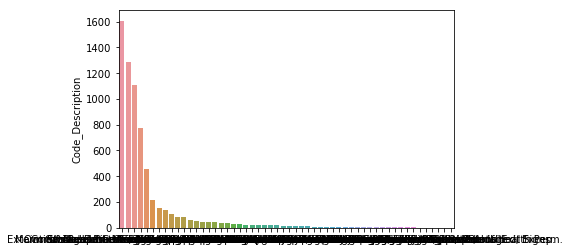

In [33]:
#Distribution of Code Description and Code Number
sns.barplot(x=Housing_Violation_Copy.Code_Description.value_counts().index, 
            y=Housing_Violation_Copy.Code_Description.value_counts())

From the above graph we can see that are able to see the graphical representation of distribution for code description and code number. From the distribution graph the reason for violation with highest occurance is little above 1600, which was 1607 to be exact from the analysis done above.

### Date Cited and Date Corrected

In [34]:
#Converting python object to datetime object
Date_Cited_Datetime = pd.to_datetime(Housing_Violation_Copy["Date_Cited"])
Date_Corrected_Datetime = pd.to_datetime(Housing_Violation_Copy["Date_Corrected"])

In [35]:
#Let's see when was the first violation cited
min(Date_Cited_Datetime)

Timestamp('2011-09-22 00:00:00')

In [36]:
#Let's see when was the most recent violation cited
max(Date_Cited_Datetime)

Timestamp('2017-09-05 06:00:09')

In [37]:
#Let's see when was the first violation corrected 
min(Date_Corrected_Datetime)

Timestamp('2013-02-25 00:00:00')

In [38]:
#When was the last violation corrected
max(Date_Corrected_Datetime) 

Timestamp('2017-09-05 06:00:10')

There are some intresting things that can be seen from the above analysis:

* First violation ever to be cited was in year of 2011 while first violation ever to be corrected was in year 2013, which is weird and have to be looked in more detail to know what exactly is happening.

* The last violation in data to be cited and the last violation to be corrected which can defitely be 2 different things but both of them have just 1 min difference. We have to see what exactly is happening there.

In [39]:
#Length of time period from the first citation till now
max(Date_Cited_Datetime) - min(Date_Cited_Datetime)

Timedelta('2175 days 06:00:09')

In [40]:
#Length of time period from the first corrected violation till now
max(Date_Corrected_Datetime) - min(Date_Corrected_Datetime)

Timedelta('1653 days 06:00:10')

The above difference between the time period of ciated vs corrected make sense as the first violation ever to be corrected was in 2013 while to be cited was in 2011

In [41]:
#Stripping time from datetime in Date_Cited and Date_Corrected and putting them in a dataframe to do further analysis
Date_Cited = Housing_Violation_Copy["Date_Cited"].str.split(" ").str[0]

In [42]:
Date_Corrected = Housing_Violation_Copy["Date_Corrected"].str.split(" ").str[0]

In [43]:
Date_Cited.head()

0    05/25/2016
1    11/30/2015
2    09/01/2016
3    06/27/2016
4    05/26/2016
Name: Date_Cited, dtype: object

In [44]:
Date_Corrected.head()

0    06/28/2016
1    01/14/2016
2    10/04/2016
3    07/11/2016
4    06/29/2016
Name: Date_Corrected, dtype: object

In [45]:
Date_Cited_Corrected = pd.concat([Date_Cited, Date_Corrected], axis=1)

In [46]:
Date_Cited_Corrected.head()

Date_Cited Date_Corrected
0  05/25/2016     06/28/2016
1  11/30/2015     01/14/2016
2  09/01/2016     10/04/2016
3  06/27/2016     07/11/2016
4  05/26/2016     06/29/2016

In [47]:
#Converting the dataframe to datetime object
DateCited_Datime = pd.to_datetime(Date_Cited_Corrected["Date_Cited"])
DateCited_Datime.head()

0   2016-05-25
1   2015-11-30
2   2016-09-01
3   2016-06-27
4   2016-05-26
Name: Date_Cited, dtype: datetime64[ns]

In [48]:
DateCorrected_Datime= pd.to_datetime(Date_Cited_Corrected["Date_Corrected"])
DateCorrected_Datime.head()

0   2016-06-28
1   2016-01-14
2   2016-10-04
3   2016-07-11
4   2016-06-29
Name: Date_Corrected, dtype: datetime64[ns]

In [49]:
#Calculating the difference between the Date Corrected and Date Cited
Date_Diff = DateCorrected_Datime - DateCited_Datime
Date_Diff.head()

0   34 days
1   45 days
2   33 days
3   14 days
4   34 days
dtype: timedelta64[ns]

In [50]:
type(Date_Diff[1])

pandas._libs.tslib.Timedelta

In [51]:
#Since each difference between the dates is a timedelta object, we have to convert it to integer to be able to plot the
#distribution
a = Date_Diff.dt.days

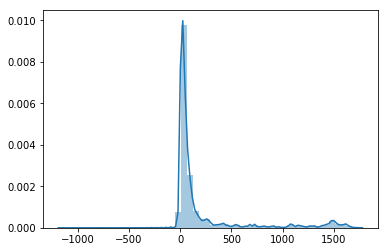

In [52]:
sns.distplot(a)

From above distribution graph we can see that there are some negative values between the difference of corrected date and cited date which basically mean that the violation was corrected before it could be cited which is practically impossible. It means that there is was some error while putting in that data. Let's see the erronous data and remove it to carry forward further analysis.

In [53]:
#Finding the index of the 
len_values =0
index_values = []
for index, value in enumerate(a):
    if value < 0:
        print (index, value)
        len_values += 1
        index_values.append(index)
        
len_values

290 -71
344 -71
432 -71
448 -71
461 -71
491 -71
1932 -18
2853 -264
3181 -2
4180 -1
4227 -1148
4900 -264


12

So there are 12 values at given above index and with negative values of difference as given above. Let's see what is this data and remove it from the dataset to carry further analysis.

In [54]:
index_values

[290, 344, 432, 448, 461, 491, 1932, 2853, 3181, 4180, 4227, 4900]

In [55]:
for i in index_values:
    print (Housing_Violation_Copy.iloc[i])

Address             183 HARVARD ST Cambridge, MA 02139
Parcel                                          76-126
Code_Number                                      410.6
Code_Description        Storage of Garbage and Rubbish
Date_Cited                      09/09/2015 12:00:00 AM
Date_Corrected                  06/30/2015 12:00:00 AM
Violation_Status                             Corrected
Case_Number                            HOU-009081-2015
Code_Case_Status                                Active
Coordinates                    (42.366514, -71.096522)
Name: 290, dtype: object
Address             183 HARVARD ST Cambridge, MA 02139
Parcel                                          76-126
Code_Number                                    410.451
Code_Description                   Egress Obstructions
Date_Cited                      09/09/2015 12:00:00 AM
Date_Corrected                  06/30/2015 12:00:00 AM
Violation_Status                             Corrected
Case_Number                            H

Out of above 12 observation all have Date corrected earlier than the citation date. One more thing to note here is that first 6 observations have the same mistake and date difference of -71 days.

In [56]:
#Dropping 12 rows corrosponding to indexes haveing negative date differences
DateCited_Datime_New = DateCited_Datime.drop(DateCited_Datime.index[index_values])

In [57]:
DateCorrected_Datime_New = DateCorrected_Datime.drop(DateCorrected_Datime.index[index_values])

In [58]:
#Repeting the same procedure for plotting the distribution for the difference but by dropping the 12 negative difference
#variables
Date_Diff_New = DateCorrected_Datime_New - DateCited_Datime_New
b = Date_Diff_New.dt.days

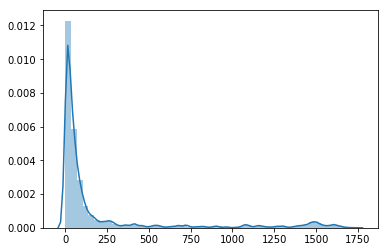

In [59]:
#Distribution plot for new values
sns.distplot(b)

In [60]:
#Summary statistics for difference in dates after dropping the misleading data
b.describe()

count    6676.000000
mean      203.113092
std       396.025312
min         0.000000
25%        16.000000
50%        45.000000
75%       118.000000
max      1736.000000
dtype: float64

Conclusions from the distribution plot and summary statistics:

* From distribution plot we can see kind of normal distribution curve with a small curve part before 0 holding no values.

* A large voloume of data seems to be enclosed around 100 mark on the graph which can be cross validated from summary statistics suggesting that 75 percent of violation cases were closed within 118 days from the time when they were issued.

* Mean amount of time is for the case to get closed is 203.1 days which is clealy reason of outliers where cases take more than 250 days to close. Values are extending upto 1736 days which is clealy a sign of baiseness of the mean.



### Violation Status

In [61]:
Housing_Violation_Copy.Violation_Status.value_counts()

Corrected    5362
Cited        1326
Name: Violation_Status, dtype: int64

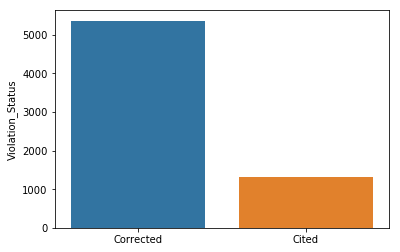

In [62]:
sns.barplot(x=Housing_Violation_Copy.Violation_Status.value_counts().index, 
            y=Housing_Violation_Copy.Violation_Status.value_counts())

The above graph gives us information about number of cases corrected v/s the cases cited. The percentage of corrected cases is 80.17 percent and percentage of cited cases are 19.83 percent.

In [63]:
Housing_Violation_Copy.Case_Number.value_counts()

HOU-003259-2014    28
HOU-009675-2015    20
HOU-019116-2017    16
HOU-005770-2014    15
HOU-006148-2014    15
HOU-009091-2015    13
HOU-001948-2013    12
HOU-005382-2014    12
HOU-008917-2015    12
HOU-012489-2016    12
HOU-009092-2015    12
HOU-009391-2015    12
HOU-000949-2013    12
HOU-008603-2015    12
HOU-012209-2016    12
HOU-006127-2014    11
HOU-000600-2013    11
HOU-009074-2015    10
HOU-014553-2016    10
HOU-011997-2016    10
HOU-014266-2016    10
HOU-006958-2015    10
HOU-012741-2016     9
HOU-013015-2016     9
HOU-004166-2014     9
HOU-000674-2013     9
HOU-000246-2013     9
HOU-008451-2015     9
HOU-016123-2016     8
HOU-005385-2014     8
                   ..
HOU-000907-2013     1
HOU-002143-2013     1
HOU-015905-2016     1
HOU-013859-2016     1
HOU-000688-2013     1
HOU-009749-2015     1
HOU-003044-2013     1
HOU-004778-2014     1
HOU-001687-2013     1
HOU-000715-2013     1
HOU-001366-2013     1
HOU-012966-2016     1
HOU-002578-2013     1
HOU-009004-2015     1
HOU-008771

There is something interesting happening here. Earlier from initial look of our data, it looked like the "case number" attribute is unique for each violation but now since we have another look at it, there is data with same case number applied to multiple violations. Let's see what's happening here. Let's explore the case with 28 same case number.

In [64]:
Housing_Violation_Copy[Housing_Violation_Copy["Case_Number"] =="HOU-003259-2014"]

Address      Parcel  Code_Number  \
1720   645 Cambridge St Cambridge, MA 02139  140-149-61      410.602   
1837  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.254   
1919   645 Cambridge St Cambridge, MA 02139       35-60      410.602   
2177   645 Cambridge St Cambridge, MA 02139  140-149-61      410.450   
2351  1643 Cambridge St Cambridge, MA 02139       35-60      410.750   
2529  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.450   
2536  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.481   
2601  1643 Cambridge St Cambridge, MA 02139       35-60      410.450   
2636   645 Cambridge St Cambridge, MA 02139       35-60      410.481   
2694   645 Cambridge St Cambridge, MA 02139  140-149-61      410.481   
2727   645 Cambridge St Cambridge, MA 02139  140-149-61      410.500   
3057   645 Cambridge St Cambridge, MA 02139       35-60      410.451   
3236  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.750   
3242   645 Cambridge St Cambridge, MA 02139  140-149-61      410.750   
3322   645 Cambridge St Cambridge, MA 02139       35-60      410.450   
3410   645 Cambridge St Cambridge, MA 02139       35-60      410.254   
3816  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.500   
3834   645 Cambridge St Cambridge, MA 02139       35-60      410.500   
4466  1643 Cambridge St Cambridge, MA 02139       35-60      410.602   
4641  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.451   
4702   645 Cambridge St Cambridge, MA 02139       35-60      410.750   
4954  1643 Cambridge St Cambridge, MA 02139       35-60      410.481   
4978   645 Cambridge St Cambridge, MA 02139  140-149-61      410.451   
5049  1643 Cambridge St Cambridge, MA 02139       35-60      410.451   
5138  1643 Cambridge St Cambridge, MA 02139       35-60      410.254   
5147   645 Cambridge St Cambridge, MA 02139  140-149-61      410.254   
5683  1643 Cambridge St Cambridge, MA 02139       35-60      410.500   
5688  1643 Cambridge St Cambridge, MA 02139  140-149-61      410.602   

                                       Code_Description  \
1720      Maint. of Areas Free from Garbage and Rubbish   
1837      Light in Passageways, Hallways, and Stairways   
1919      Maint. of Areas Free from Garbage and Rubbish   
2177                                    Means of Egress   
2351  Cond. Deemed to Endgr. or Impair Health or Safety   
2529                                    Means of Egress   
2536                           Posting of Name of Owner   
2601                                    Means of Egress   
2636                           Posting of Name of Owner   
2694                           Posting of Name of Owner   
2727      Owner's Resp. to Maintain Structural Elements   
3057                                Egress Obstructions   
3236  Cond. Deemed to Endgr. or Impair Health or Safety   
3242  Cond. Deemed to Endgr. or Impair Health or Safety   
3322                                    Means of Egress   
3410      Light in Passageways, Hallways, and Stairways   
3816      Owner's Resp. to Maintain Structural Elements   
3834      Owner's Resp. to Maintain Structural Elements   
4466      Maint. of Areas Free from Garbage and Rubbish   
4641                                Egress Obstructions   
4702  Cond. Deemed to Endgr. or Impair Health or Safety   
4954                           Posting of Name of Owner   
4978                                Egress Obstructions   
5049                                Egress Obstructions   
5138      Light in Passageways, Hallways, and Stairways   
5147      Light in Passageways, Hallways, and Stairways   
5683      Owner's Resp. to Maintain Structural Elements   
5688      Maint. of Areas Free from Garbage and Rubbish   

                  Date_Cited          Date_Corrected Violation_Status  \
1720  01/07/2014 12:00:00 AM  01/21/2014 12:00:00 AM        Corrected   
1837  01/07/2014 12:00:00 AM  01/21/2014 12:00:00 AM        Corrected   
1919  01/07/2014

In [65]:
Housing_Violation_Copy[Housing_Violation_Copy["Case_Number"] =="HOU-009675-2015"]

Address        Parcel  Code_Number  \
3362  254 Western Ave Cambridge, MA 02139        126-62      410.602   
3592  254 Western Ave Cambridge, MA 02139        126-62      410.550   
3732  254 Western Ave Cambridge, MA 02139        126-62      410.482   
3932  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.451   
4068  254 Western Ave Cambridge, MA 02139        126-62      410.351   
4110  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.550   
5447  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.500   
5456  254 Western Ave Cambridge, MA 02139        126-62      410.601   
5810  254 Western Ave Cambridge, MA 02139        126-62      410.750   
5832  254 Western Ave Cambridge, MA 02139        126-62      410.450   
5865  254 Western Ave Cambridge, MA 02139        126-62      410.451   
5957  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.601   
6072  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.450   
6166  254 Western Ave Cambridge, MA 02139        126-62      410.500   
6224  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.482   
6306  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.351   
6319  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.600   
6565  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.602   
6586  254 Western Ave Cambridge, MA 02139        126-62      410.600   
6621  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.750   

                                       Code_Description  \
3362      Maint. of Areas Free from Garbage and Rubbish   
3592       Extermination of Insects, Rodents and Skunks   
3732         Smoke Detectors and Carbon Monoxide Alarms   
3932                                Egress Obstructions   
4068          Owner's Inst. and Maint. Responsibilities   
4110       Extermination of Insects, Rodents and Skunks   
5447      Owner's Resp. to Maintain Structural Elements   
5456                  Collection of Garbage and Rubbish   
5810  Cond. Deemed to Endgr. or Impair Health or Safety   
5832                                    Means of Egress   
5865                                Egress Obstructions   
5957                  Collection of Garbage and Rubbish   
6072                                    Means of Egress   
6166      Owner's Resp. to Maintain Structural Elements   
6224         Smoke Detectors and Carbon Monoxide Alarms   
6306          Owner's Inst. and Maint. Responsibilities   
6319                     Storage of Garbage and Rubbish   
6565      Maint. of Areas Free from Garbage and Rubbish   
6586                     Storage of Garbage and Rubbish   
6621  Cond. Deemed to Endgr. or Impair Health or Safety   

                  Date_Cited          Date_Corrected Violation_Status  \
3362  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
3592  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
3732  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
3932  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
4068  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
4110  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
5447  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
5456  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5810  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5832  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5865  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5957  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6072  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6166  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
6224  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6306  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6319  10/28/2015 12:00:00 AM  09/05/2017

In [66]:
Housing_Violation_Copy[Housing_Violation_Copy["Case_Number"] =="HOU-009675-2015"]


Address        Parcel  Code_Number  \
3362  254 Western Ave Cambridge, MA 02139        126-62      410.602   
3592  254 Western Ave Cambridge, MA 02139        126-62      410.550   
3732  254 Western Ave Cambridge, MA 02139        126-62      410.482   
3932  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.451   
4068  254 Western Ave Cambridge, MA 02139        126-62      410.351   
4110  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.550   
5447  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.500   
5456  254 Western Ave Cambridge, MA 02139        126-62      410.601   
5810  254 Western Ave Cambridge, MA 02139        126-62      410.750   
5832  254 Western Ave Cambridge, MA 02139        126-62      410.450   
5865  254 Western Ave Cambridge, MA 02139        126-62      410.451   
5957  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.601   
6072  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.450   
6166  254 Western Ave Cambridge, MA 02139        126-62      410.500   
6224  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.482   
6306  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.351   
6319  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.600   
6565  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.602   
6586  254 Western Ave Cambridge, MA 02139        126-62      410.600   
6621  254 Western Ave Cambridge, MA 02139  126-62-254/1      410.750   

                                       Code_Description  \
3362      Maint. of Areas Free from Garbage and Rubbish   
3592       Extermination of Insects, Rodents and Skunks   
3732         Smoke Detectors and Carbon Monoxide Alarms   
3932                                Egress Obstructions   
4068          Owner's Inst. and Maint. Responsibilities   
4110       Extermination of Insects, Rodents and Skunks   
5447      Owner's Resp. to Maintain Structural Elements   
5456                  Collection of Garbage and Rubbish   
5810  Cond. Deemed to Endgr. or Impair Health or Safety   
5832                                    Means of Egress   
5865                                Egress Obstructions   
5957                  Collection of Garbage and Rubbish   
6072                                    Means of Egress   
6166      Owner's Resp. to Maintain Structural Elements   
6224         Smoke Detectors and Carbon Monoxide Alarms   
6306          Owner's Inst. and Maint. Responsibilities   
6319                     Storage of Garbage and Rubbish   
6565      Maint. of Areas Free from Garbage and Rubbish   
6586                     Storage of Garbage and Rubbish   
6621  Cond. Deemed to Endgr. or Impair Health or Safety   

                  Date_Cited          Date_Corrected Violation_Status  \
3362  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
3592  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
3732  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
3932  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
4068  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
4110  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
5447  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
5456  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5810  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5832  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5865  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
5957  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6072  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6166  10/28/2015 12:00:00 AM  09/05/2017 06:00:09 AM            Cited   
6224  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6306  10/28/2015 12:00:00 AM  09/05/2017 06:00:10 AM            Cited   
6319  10/28/2015 12:00:00 AM  09/05/2017

We observed individual observation for 3 random case number (HOU-003259-2014, HOU-009675-2015, HOU-009675-2015) which have multiple values in the coloumn as above. It necessarly does not mean the case numbers are particular to an address but can have multiple addresses but an observation for addresses is that all the address having the same case number belong to same street. Apart from that one more observation that is common to all the values for the same case number is that they all have the same citation date and the correction date. There can be some infrences drawn from above statment but validity of those necessarly can't be proved through the data. Invalidity can be proved though.

### Code Case Status

In [67]:
Housing_Violation_Copy.Code_Case_Status.value_counts()

Closed    6008
Active     570
Court      110
Name: Code_Case_Status, dtype: int64

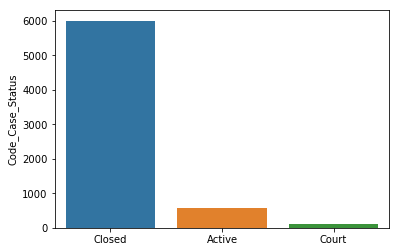

In [68]:
sns.barplot(x=Housing_Violation_Copy.Code_Case_Status.value_counts().index, 
            y=Housing_Violation_Copy.Code_Case_Status.value_counts())

When we talk about "code case status", it can be grouped in three categories. Closed, active and court. Closed cases are the ones which have been dealt in the court and result have been announced by the court on those cases, active are the ones which have been cited and are not in the court and court cases are the ones o which have active hearing in the court. We see that that out of 6688 total cases 6008 cases have been closed i.e. almost 90 percent, means that court is doing a good job dealing with the violations. If we want to have a closer look we can even see cases of last two months and see what percentage of cases are in what category and if a case is active since a long time we can analyze individual cases and see where is the exact problem.

### Coordinates

Since I am not doing the clustering using the latitude logitude data as stated above, I got a clustered version from cambridge open source data website, the .png version of which is included below to show how the violation addresses are distributed all over the city. The area near the harvard university seems to have least number of violations out of all. Lot's of violations are accumlated near Bishop allen dr.

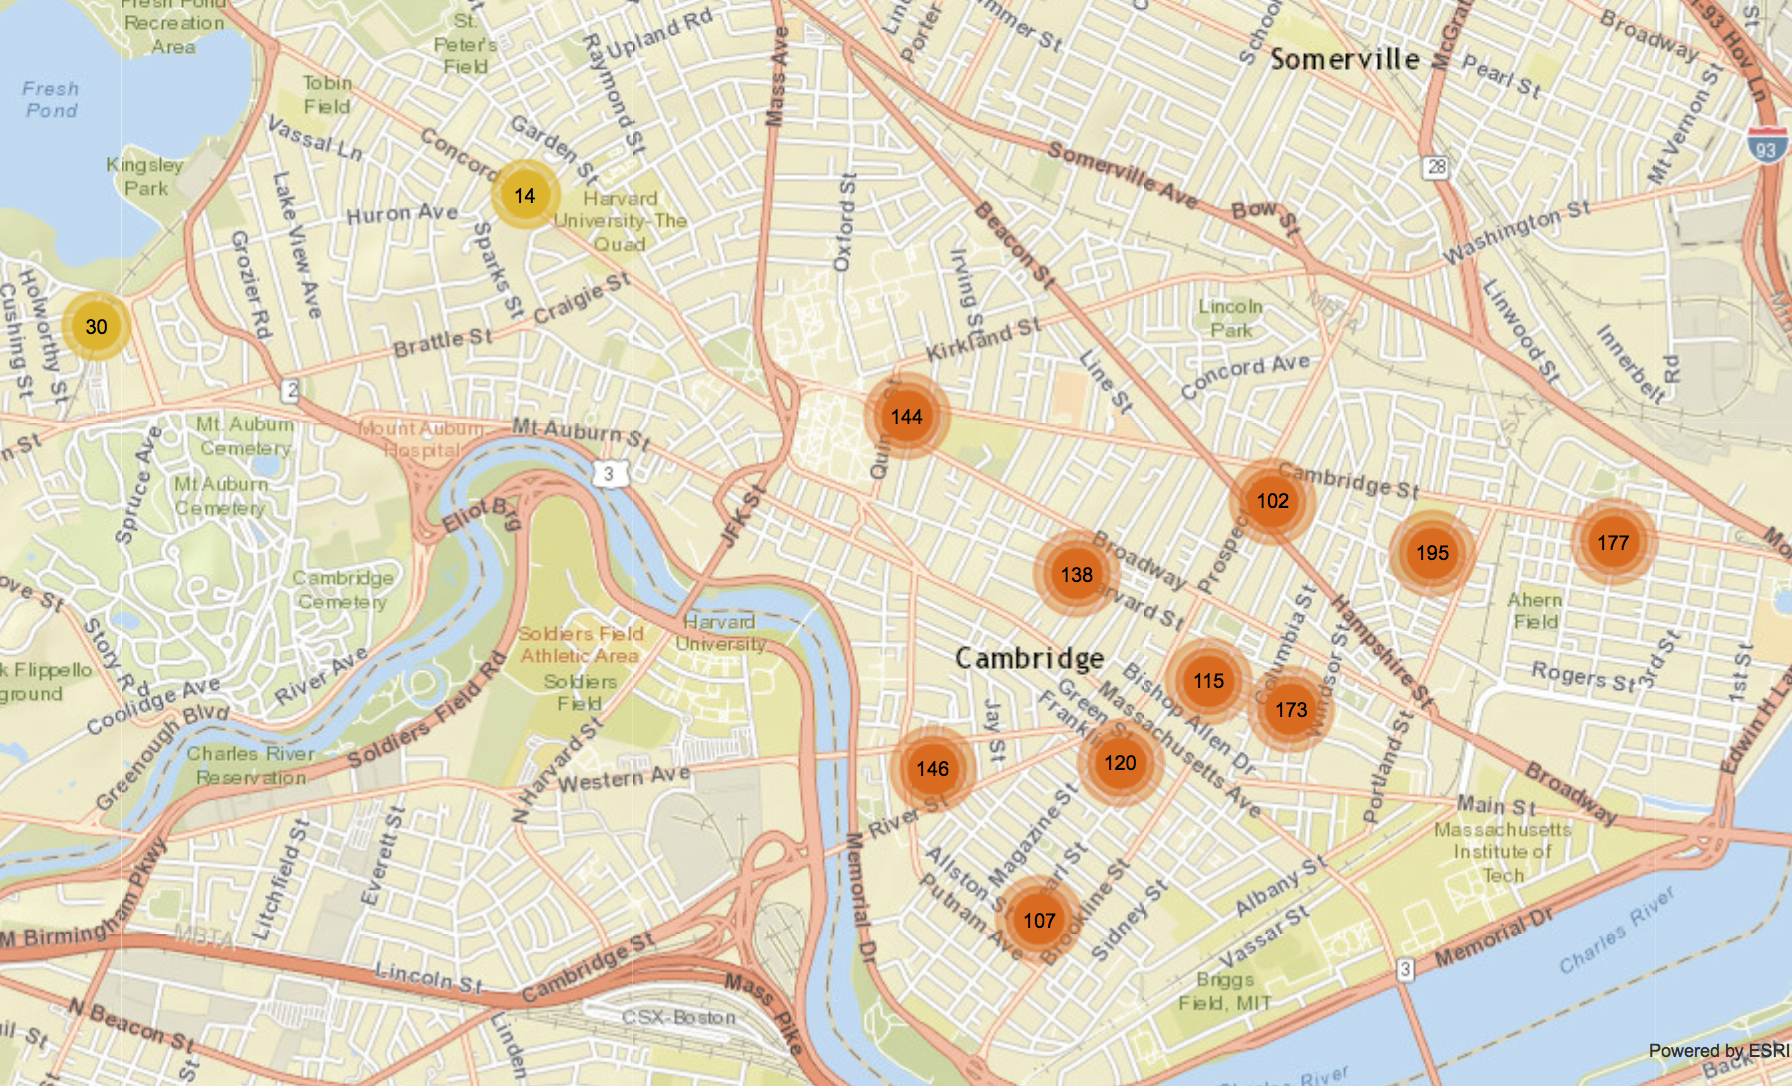

In [69]:
Image(filename=("/Users/Gurtej/Desktop/Map.png"), )

Note: As such there is no scope of drawing correlation graphs because of the kind of variables we have in the dataset

----------------------------------------------THE_END-----------------------------------------------------------------